In [1]:
# First data Exploration (values to predict, correlation ..)
import os
import datetime as dt
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir(b"C:\Users\hp\Documents\GitHub\ProjetISA")
train = pd.read_csv('Code +Data/TrainSample.csv',sep=';',decimal=',')
test = pd.read_csv('Code +Data/TestSample.csv',sep=';',decimal=',')
train.head()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead


,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),...,Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft),GasCum360,OilCum360
0,661,0.429600,-0.193201,01/06/2013,21/03/2014,08/05/2014,-1.124200,-0.214336,-1.262296,-0.153197,...,0.635528,-0.067825,0.069978,-0.253698,-1.253690,0.181738,0.979100,-0.184434,-0.323593,-0.659768
1,523,-0.082672,-0.539854,31/08/2014,17/02/2015,03/08/2015,1.286521,0.870034,0.717834,0.674376,...,-1.364776,0.835789,1.136126,0.995649,0.667339,-0.560750,1.999634,-1.225036,-0.356343,1.782547
2,703,-0.457415,-0.082104,04/11/2013,08/07/2014,30/07/2014,-0.781945,0.511093,0.592495,-0.937430,...,0.667127,-0.287786,0.979602,-0.386425,-1.253690,0.181738,-0.492791,-0.181300,-1.067145,0.283035
3,473,0.376282,-0.310432,24/11/2011,11/05/2012,13/07/2012,-0.442801,0.025900,-1.093255,0.164815,...,0.033723,-1.034051,-1.342103,-1.546778,-0.293176,-1.303237,-0.295062,2.135885,-0.734454,-0.328650
4,309,-0.113110,-0.111412,20/11/2014,07/04/2015,23/07/2015,0.258511,0.190913,1.229474,-0.347126,...,-0.868364,0.923707,1.470667,0.561383,0.667339,-0.560750,2.034630,-1.226546,-0.271119,0.975603


In [2]:
train.describe()

,API,Surf_X,Surf_Y,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),TOC_PPLS (%),Vcarb_PPLS,Vsand_PPLS,...,Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft),GasCum360,OilCum360
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,451.000000,460.000000,460.000000,460.000000,...,362.000000,332.000000,357.000000,361.000000,362.000000,362.000000,362.000000,363.000000,460.000000,460.000000
mean,408.271739,0.048312,-0.020504,-0.038670,-0.020932,-0.044322,0.032553,0.027042,0.009838,-0.018139,...,-0.000074,-0.007804,0.043509,-0.001943,0.053141,-0.007765,-0.020633,0.063128,-0.004878,-0.011122
std,228.391358,0.972776,0.974876,0.982085,0.947728,0.992127,0.983659,0.995567,1.032273,1.026098,...,0.956717,0.973805,1.032365,1.074640,1.009530,0.797089,0.987912,1.047143,1.015833,0.986570
min,1.000000,-2.426259,-2.740075,-2.325205,-2.958958,-2.135948,-3.287442,-2.169983,-3.404962,-2.125431,...,-1.576223,-6.253073,-2.784977,-2.916152,-1.693075,-1.320112,-1.959572,-1.647296,-1.241844,-0.846812
25%,206.750000,-0.377085,-0.631271,-0.723762,-0.675256,-0.854066,-0.596984,-0.593362,-0.294986,-0.718530,...,-0.637123,-0.668154,-0.622318,-0.427222,-1.163446,-0.560750,-0.533204,-0.384367,-0.670713,-0.762137
50%,412.000000,0.149286,-0.034792,-0.394263,-0.008885,-0.031200,0.177588,0.324258,0.245879,-0.190943,...,0.216815,0.079044,0.198764,0.176120,0.667339,0.159425,-0.486552,-0.178793,-0.354850,-0.269251
75%,609.250000,0.511680,0.622794,0.578986,0.612669,0.845490,0.659758,0.753375,0.786744,0.512507,...,0.489761,0.669197,0.788128,0.633616,0.667339,0.181738,0.153346,0.435225,0.443100,0.317948
max,793.000000,2.869421,3.143658,3.480066,3.885516,1.987123,1.862078,1.860650,1.868475,3.326308,...,13.261381,3.052486,2.214658,9.119090,2.588369,3.488558,4.769556,4.610967,5.366269,5.527111


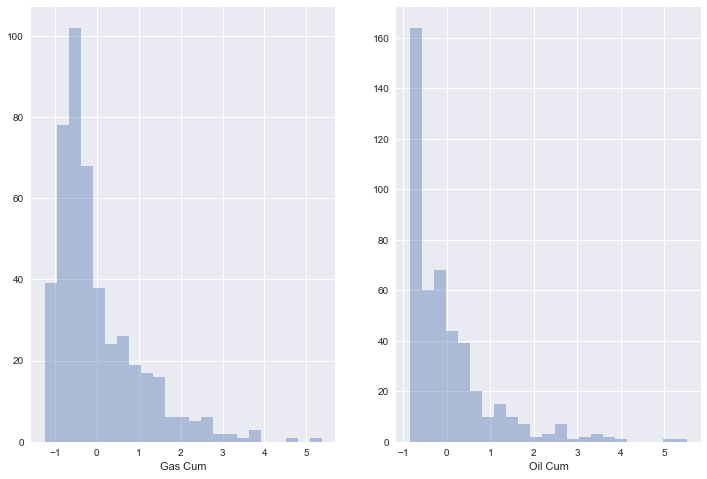

In [3]:
#Visualizing distributions of OilCum and GasCum (values to predict)
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.distplot(train.GasCum360,kde=False)
plt.xlabel('Gas Cum')
plt.subplot(122)
sns.distplot(train.OilCum360,kde=False)
plt.xlabel('Oil Cum')
#plt.axis([10,14,0,180])

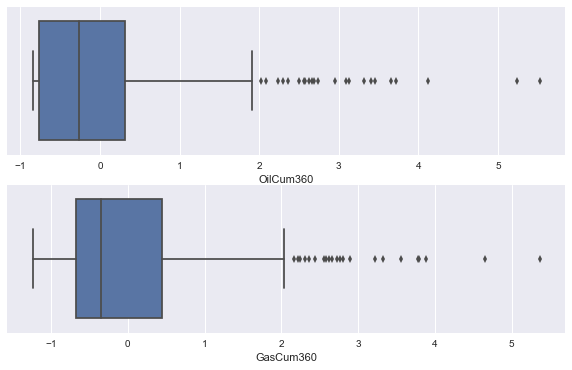

In [4]:
#it is clear that we have outliers for the two variables 
f, (ax1, ax2) = plt.subplots(2,figsize = (10, 6))
sns.boxplot(train['OilCum360'],whis=1.5,ax=ax1)
sns.boxplot(train['GasCum360'],whis=1.5,ax=ax2)

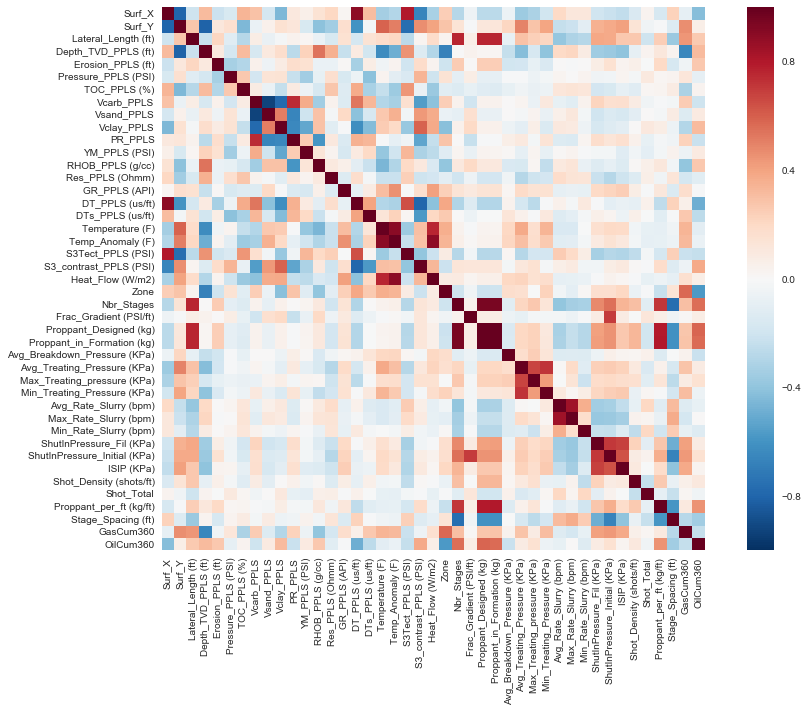

In [5]:
#Pour mieux visualiser les correlations entre les variables, on utilise heatmap. 
corr = train.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True)

In [6]:
correlationG = corr['GasCum360'].sort_values(axis=0,ascending=False).iloc[1:]
correlationO = corr['OilCum360'].sort_values(axis=0,ascending=False).iloc[1:]
print("Pour la variable GasCum :\n",correlationG)
print("Pour la variable GasCum :\n",correlationO)


Pour la variable GasCum :
 Zone                            0.571040
Surf_Y                          0.464759
Lateral_Length (ft)             0.444635
ShutInPressure_Initial (KPa)    0.436298
ShutInPressure_Fil (KPa)        0.413869
ISIP (KPa)                      0.378240
Temperature (F)                 0.337634
Temp_Anomaly (F)                0.327720
Min_Treating_Pressure (KPa)     0.306921
Nbr_Stages                      0.304499
Proppant_in_Formation (kg)      0.283659
Avg_Treating_Pressure (KPa)     0.283176
Proppant_Designed (kg)          0.279918
DTs_PPLS (us/ft)                0.267222
Vcarb_PPLS                      0.253354
PR_PPLS                         0.230320
GR_PPLS (API)                   0.177396
Heat_Flow (W/m2)                0.157747
Pressure_PPLS (PSI)             0.120171
Proppant_per_ft (kg/ft)         0.096563
Max_Treating_pressure (KPa)     0.079698
DT_PPLS (us/ft)                 0.061891
Shot_Density (shots/ft)         0.059898
Avg_Breakdown_Pressure (KPa)  

## OilCum and GasCum per Zone

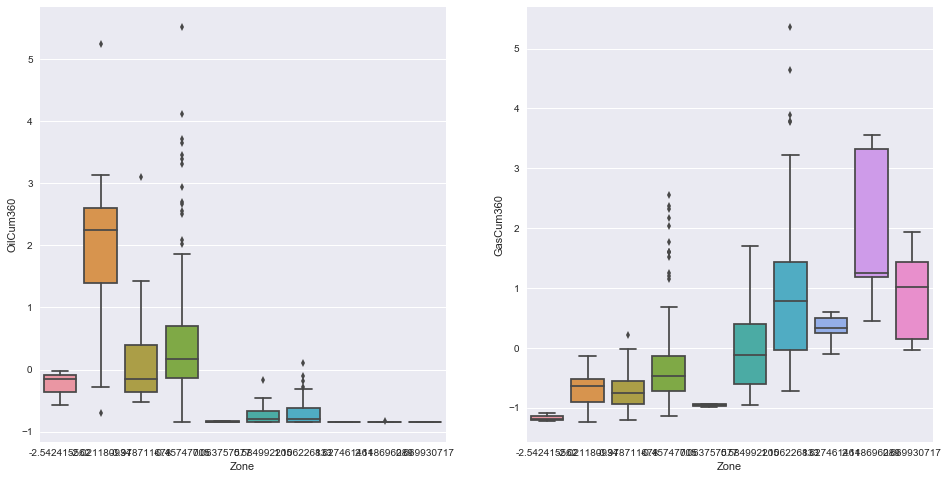

In [7]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='Zone',y='OilCum360',data=train,whis=1.5,ax=ax1)
sns.boxplot(x='Zone',y='GasCum360',data=train,whis=1.5,ax=ax2)


# Cleaning data


In [8]:
#Variables with Missing values in the train set:
mv1=train.isnull().sum()
print(mv1)

API                               0
Surf_X                            0
Surf_Y                            0
Date_Drilling                    14
Date_Completion                  14
Date_Production                   1
Lateral_Length (ft)               0
Depth_TVD_PPLS (ft)               0
Erosion_PPLS (ft)                 0
Pressure_PPLS (PSI)               9
TOC_PPLS (%)                      0
Vcarb_PPLS                        0
Vsand_PPLS                        0
Vclay_PPLS                        0
PR_PPLS                           0
YM_PPLS (PSI)                     0
RHOB_PPLS (g/cc)                  0
Res_PPLS (Ohmm)                   0
GR_PPLS (API)                     0
DT_PPLS (us/ft)                   0
DTs_PPLS (us/ft)                  0
Temperature (F)                   0
Temp_Anomaly (F)                  0
S3Tect_PPLS (PSI)                 0
S3_contrast_PPLS (PSI)            0
Heat_Flow (W/m2)                  0
Zone                              0
Nbr_Stages                  

In [9]:
#Variables with Missing values in the test set:
mv2=test.isnull().sum()
print(mv2)

API                              0
Surf_X                           0
Surf_Y                           0
Date_Drilling                   12
Date_Completion                  9
Date_Production                  2
Lateral_Length (ft)              0
Depth_TVD_PPLS (ft)              0
Erosion_PPLS (ft)                0
Pressure_PPLS (PSI)              5
TOC_PPLS (%)                     0
Vcarb_PPLS                       0
Vsand_PPLS                       0
Vclay_PPLS                       0
PR_PPLS                          0
YM_PPLS (PSI)                    0
RHOB_PPLS (g/cc)                 0
Res_PPLS (Ohmm)                  0
GR_PPLS (API)                    0
DT_PPLS (us/ft)                  0
DTs_PPLS (us/ft)                 0
Temperature (F)                  0
Temp_Anomaly (F)                 0
S3Tect_PPLS (PSI)                0
S3_contrast_PPLS (PSI)           0
Heat_Flow (W/m2)                 0
Zone                             0
Nbr_Stages                      41
Frac_Gradient (PSI/f

# Date_Processing

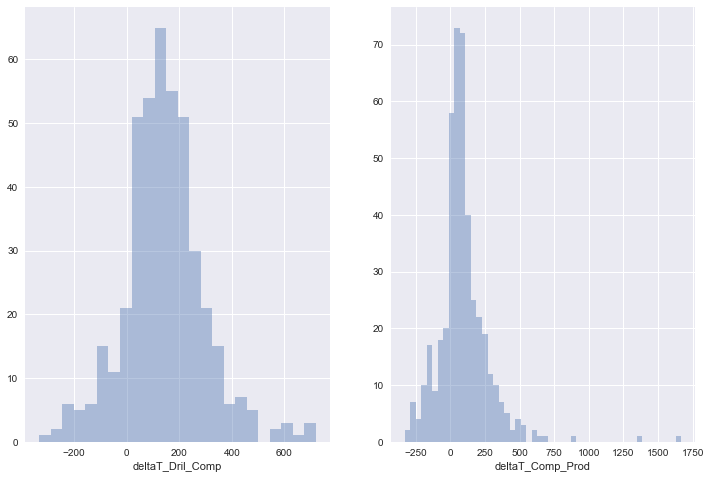

In [10]:
#Convert date variables to date time
#Missing dates
pd.to_datetime(train["Date_Drilling"])
train["Date_Drilling"]=pd.to_datetime(train["Date_Drilling"])
train["Date_Completion"]=pd.to_datetime(train["Date_Completion"])
train["Date_Production"]=pd.to_datetime(train["Date_Production"])
train["deltaT_Dril_Comp"]=(train["Date_Completion"]-train["Date_Drilling"]).dt.days
train["deltaT_Comp_Prod"]=(train["Date_Production"]-train["Date_Completion"]).dt.days
###
cols = train.columns.tolist()
train=train[cols[:6]+[cols[-2]]+[cols[-1]]+cols[6:-2]]

#Visualizing distributions of deltaT_Dril_Comp and GasCumdeltaT_Comp_Prod (values to predict)
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.distplot(train.deltaT_Dril_Comp.dropna(),kde=False)
plt.xlabel("deltaT_Dril_Comp")
plt.subplot(122)
sns.distplot(train.deltaT_Comp_Prod.dropna(),kde=False)
plt.xlabel("deltaT_Comp_Prod")

In [11]:
m_delta_comp_prod=np.floor(np.mean(train["deltaT_Comp_Prod"]))
print(m_delta_comp_prod)
m_delta_dril_comp=np.floor(np.mean(train["deltaT_Dril_Comp"]))
print(m_delta_dril_comp)

88.0
143.0


In [12]:
#Visualizing missing values fod dates
missing1=np.logical_and(np.isnan(train["deltaT_Comp_Prod"]),np.isnan(train["deltaT_Dril_Comp"]))
train.loc[missing1,["Date_Drilling","Date_Completion","Date_Production","deltaT_Dril_Comp","deltaT_Comp_Prod"]]

,Date_Drilling,Date_Completion,Date_Production,deltaT_Dril_Comp,deltaT_Comp_Prod
71,2014-02-09,NaT,2015-01-12,NaN,NaN
86,2013-12-05,NaT,2013-01-09,NaN,NaN
124,2012-09-20,NaT,2013-01-05,NaN,NaN
159,NaT,NaT,NaT,NaN,NaN
169,2014-01-07,NaT,2015-01-12,NaN,NaN
215,2014-08-06,NaT,2014-01-09,NaN,NaN
238,NaT,NaT,2016-04-14,NaN,NaN
248,2015-10-25,NaT,2016-06-06,NaN,NaN
289,2014-11-08,NaT,2015-01-12,NaN,NaN
331,NaT,NaT,2016-01-01,NaN,NaN


In [13]:
#We replace missing values for the deltaTs with the mean of their distribution (normal)
train.loc[missing1,"deltaT_Dril_Comp"]=m_delta_dril_comp
train.loc[missing1,"deltaT_Comp_Prod"]=m_delta_comp_prod

In [14]:
train.loc[missing1,["Date_Drilling","Date_Completion","Date_Production","deltaT_Dril_Comp","deltaT_Comp_Prod"]]

,Date_Drilling,Date_Completion,Date_Production,deltaT_Dril_Comp,deltaT_Comp_Prod
71,2014-02-09,NaT,2015-01-12,143.0,88.0
86,2013-12-05,NaT,2013-01-09,143.0,88.0
124,2012-09-20,NaT,2013-01-05,143.0,88.0
159,NaT,NaT,NaT,143.0,88.0
169,2014-01-07,NaT,2015-01-12,143.0,88.0
215,2014-08-06,NaT,2014-01-09,143.0,88.0
238,NaT,NaT,2016-04-14,143.0,88.0
248,2015-10-25,NaT,2016-06-06,143.0,88.0
289,2014-11-08,NaT,2015-01-12,143.0,88.0
331,NaT,NaT,2016-01-01,143.0,88.0


#### We see that we have a well that have the three dates missing ( we can estimate the one that is correlated more with the Zone for example) , fo the other lines we use the date of production to estimate date of completion with the mean of deltaT and the same for date of drilling

In [15]:
train.loc[np.logical_and(missing1,~(train.Date_Production).isnull()),"Date_Completion"]=pd.to_datetime(train.loc[np.logical_and(missing1,~(train.Date_Production).isnull()),"Date_Production"]-dt.timedelta(days=m_delta_comp_prod))

In [16]:
miss_dril=np.logical_and((train.Date_Drilling).isnull(),~(train.Date_Production).isnull())
train.loc[np.logical_and(missing1,miss_dril),"Date_Drilling"]=pd.to_datetime(train.loc[np.logical_and(missing1,miss_dril),"Date_Completion"]-dt.timedelta(days=m_delta_dril_comp))

In [17]:
train.loc[missing1,["Date_Drilling","Date_Completion","Date_Production","deltaT_Dril_Comp","deltaT_Comp_Prod"]]

,Date_Drilling,Date_Completion,Date_Production,deltaT_Dril_Comp,deltaT_Comp_Prod
71,2014-02-09,2014-10-16,2015-01-12,143.0,88.0
86,2013-12-05,2012-10-13,2013-01-09,143.0,88.0
124,2012-09-20,2012-10-09,2013-01-05,143.0,88.0
159,NaT,NaT,NaT,143.0,88.0
169,2014-01-07,2014-10-16,2015-01-12,143.0,88.0
215,2014-08-06,2013-10-13,2014-01-09,143.0,88.0
238,2015-08-27,2016-01-17,2016-04-14,143.0,88.0
248,2015-10-25,2016-03-10,2016-06-06,143.0,88.0
289,2014-11-08,2014-10-16,2015-01-12,143.0,88.0
331,2015-05-15,2015-10-05,2016-01-01,143.0,88.0


In [18]:
train.loc[train.Date_Drilling.isnull(),"deltaT_Dril_Comp"]=m_delta_dril_comp
train.loc[train.Date_Drilling.isnull(),"Date_Drilling"]=pd.to_datetime(train.loc[train.Date_Drilling.isnull(),"Date_Completion"]-dt.timedelta(days=m_delta_dril_comp))

In [19]:
dfTest = pd.read_csv('Code +Data/TestSample.csv',sep=';',decimal=',')
dfTest.head()

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
0,633,0.201275,-0.577329,23/06/2013,26/10/2013,10/01/2014,-0.694826,0.641631,-0.356227,1.410748,...,0.908861,0.395627,0.667402,NaN,-0.740473,0.131374,0.187082,2.409201,0.160140,-0.710739
1,587,0.222609,0.670307,02/06/2012,03/07/2012,05/08/2013,-0.479516,-1.377997,-1.812483,1.605136,...,-0.922311,0.896792,0.285738,-0.919600,-1.103957,-1.282464,0.667339,-0.560750,-1.149666,2.085649
2,264,0.022105,0.404387,19/05/2013,24/07/2013,06/10/2013,0.310782,-0.775745,0.243462,-0.136014,...,0.148860,-0.094971,0.459046,0.614126,1.029028,1.103339,-0.773433,0.924226,-0.585869,-0.137427
3,680,0.384359,0.372793,18/08/2012,19/12/2012,12/06/2013,-0.624508,-1.082974,-1.922374,1.443630,...,0.970521,1.132279,0.332100,-0.782232,0.450368,-0.136076,0.667339,-0.560750,0.595622,1.887260
4,443,-0.138513,0.408803,11/09/2013,29/03/2014,11/05/2014,0.338785,-0.616106,0.556826,-1.011425,...,0.786056,0.985914,0.323490,NaN,0.743256,0.835687,-1.253690,0.181738,0.151633,-0.216512


# OTHER VARIABLES

In [20]:
#Extract outliers and replacing method
def outliers(df,column,factor_iqr):
    #quartiles
    Q1=np.percentile(df.dropna()[column],25)
    Q3=np.percentile(df.dropna()[column],75)
    iqr=Q3-Q1    
    #identify outliers
    mean=np.mean(df[column])
    index=np.logical_or(df[column]< Q1 - factor_iqr*iqr, df[column]> Q3 + factor_iqr*iqr)
    outliers=df[index]
    return outliers
def replace_by_mean(df,column,outliers):
    m=np.mean(df[column])
    df.loc[outliers.index,column]=m  
    
def replace_by_mean_of_zone(df,column,outliers):
    for i in outliers.index:
        z=outliers.loc[i,"Zone"]
        m=np.mean(df[df["Zone"]==z].loc[:,column])
        df.loc[i,column]=m

# Zone

In [21]:
sorted(train.Zone.unique())

[-2.542415562,
 -2.0211809340000002,
 -0.97871167799999992,
 -0.45747705,
 0.063757576999999996,
 0.58499220500000004,
 1.106226833,
 1.627461461,
 2.148696089,
 2.6699307169999997]

In [22]:
sorted(test.Zone.unique())

[-2.542415562,
 -2.0211809340000002,
 -1.499946306,
 -0.97871167799999992,
 -0.45747705,
 0.063757576999999996,
 0.58499220500000004,
 1.106226833,
 1.627461461,
 2.148696089,
 2.6699307169999997]

Taking in consideration Andi s analysis about the zone Attribute, It s a categorial variable, i ll change the zone values
to 0-9

In [23]:
train = train.replace({'Zone':{
        sorted(train.Zone.unique())[0]: 'Z0',
        sorted(train.Zone.unique())[1]: 'Z1',
        sorted(train.Zone.unique())[2]: 'Z2',
        sorted(train.Zone.unique())[3]: 'Z3',
        sorted(train.Zone.unique())[4]: 'Z4',
        sorted(train.Zone.unique())[5]: 'Z5',
        sorted(train.Zone.unique())[6]: 'Z6',
        sorted(train.Zone.unique())[7]: 'Z7',
        sorted(train.Zone.unique())[8]: 'Z8',
        sorted(train.Zone.unique())[9]: 'Z9',
            }
        }
)

Till now we have only Zone as a categorical variable , maybe plotting OiCum and GazCum by Zone can help us understand relations
-> Zone is correlated with oilcum with a coeff 0.6 (second most correlated variable)

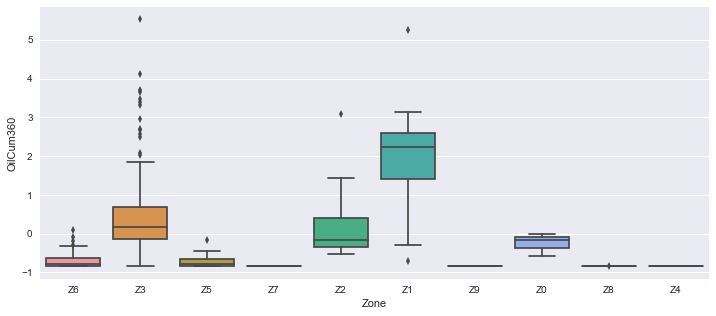

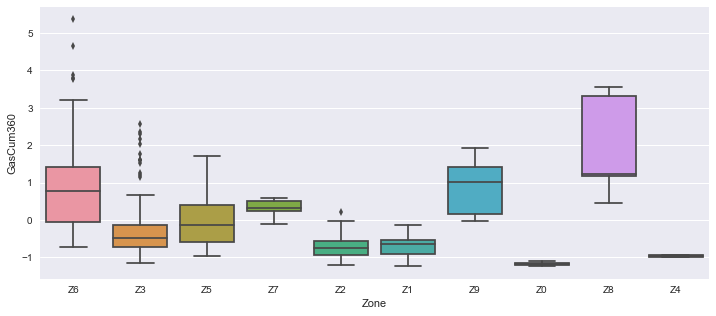

In [24]:
plt.figure(figsize = (12, 5))
sns.boxplot(x='Zone', y='OilCum360', data=train,whis=1.5)

plt.figure(figsize = (12, 5))
sns.boxplot(x='Zone', y='GasCum360', data=train,whis=1.5)

This can help us to detect Zones of gas/Oil

# Lateral_Length (ft)

In [25]:
#MV
train["Lateral_Length (ft)"].isnull().sum()

0

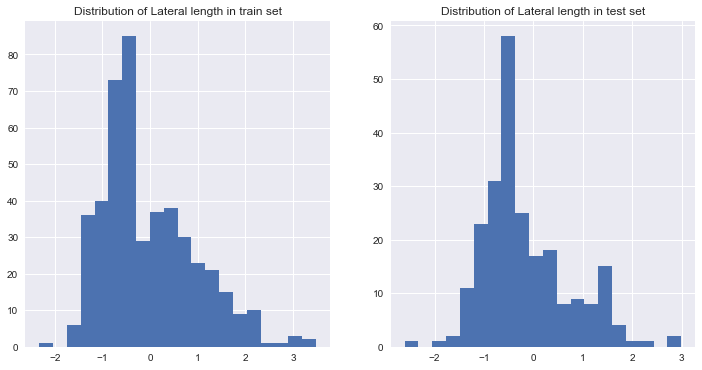

In [26]:
# Check distribution of Lateral_Length:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
(train.loc[:,"Lateral_Length (ft)"]).hist(ax=ax1,bins=20)
ax1.set_title("Distribution of Lateral length in train set")
(test.loc[:,"Lateral_Length (ft)"]).hist(ax=ax2,bins=20)
ax2.set_title("Distribution of Lateral length in test set")

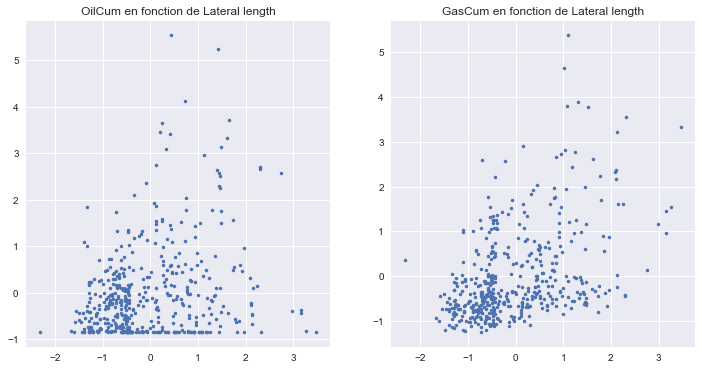

In [27]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(train["Lateral_Length (ft)"], train.OilCum360,'.')
ax1.set_title("OilCum en fonction de Lateral length")
ax2.plot(train["Lateral_Length (ft)"], train.GasCum360,'.')
ax2.set_title("GasCum en fonction de Lateral length")

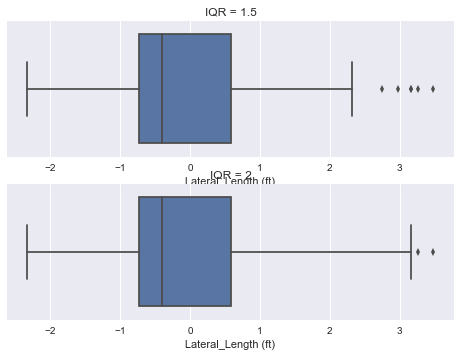

In [28]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(train["Lateral_Length (ft)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(train["Lateral_Length (ft)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [29]:
o=outliers(train,"Lateral_Length (ft)",1.5)[["Lateral_Length (ft)","Zone"]]
o

,Lateral_Length (ft),Zone
133,2.748262,Z3
193,3.259778,Z5
260,3.164569,Z6
300,3.480066,Z8
319,3.164569,Z6
402,2.979751,Z6


In [30]:
replace_by_mean_of_zone(train,"Lateral_Length (ft)",o)
train.loc[o.index,"Lateral_Length (ft)"]

133    0.019040
193   -0.269104
260    0.005173
300    1.086519
319   -0.023812
402   -0.053063
Name: Lateral_Length (ft), dtype: float64

# Depth_TVD_PPLS (ft)

In [31]:
#MV
train["Depth_TVD_PPLS (ft)"].isnull().sum()

0

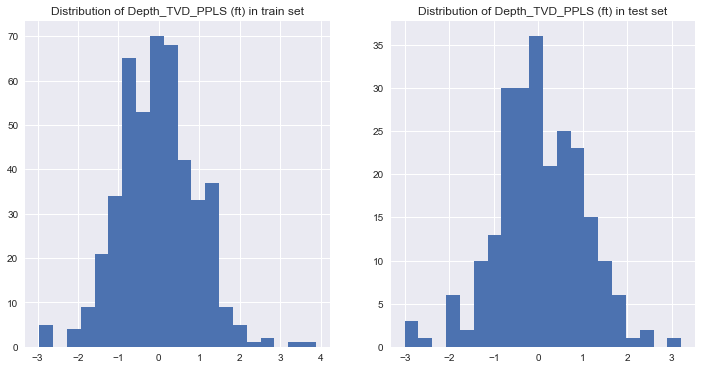

In [32]:
# Check distribution of Lateral_Length:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
(train.loc[:,"Depth_TVD_PPLS (ft)"]).hist(ax=ax1,bins=20)
ax1.set_title("Distribution of Depth_TVD_PPLS (ft) in train set")
(test.loc[:,"Depth_TVD_PPLS (ft)"]).hist(ax=ax2,bins=20)
ax2.set_title("Distribution of Depth_TVD_PPLS (ft) in test set")

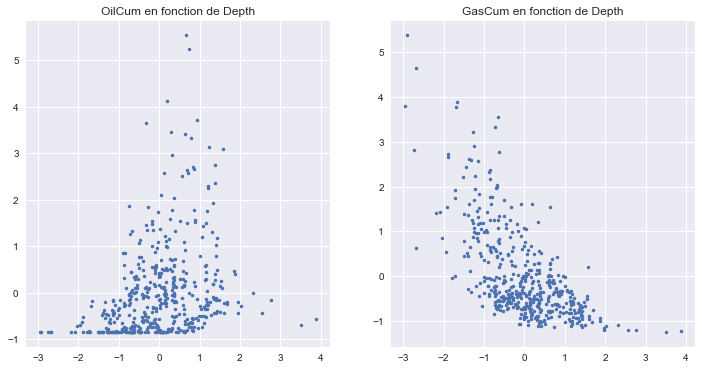

In [33]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(train["Depth_TVD_PPLS (ft)"], train.OilCum360,'.')
ax1.set_title("OilCum en fonction de Depth")
ax2.plot(train["Depth_TVD_PPLS (ft)"], train.GasCum360,'.')
ax2.set_title("GasCum en fonction de Depth")

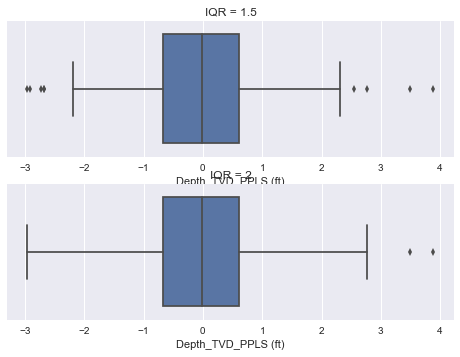

In [34]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(train["Depth_TVD_PPLS (ft)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(train["Depth_TVD_PPLS (ft)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [35]:
o1=outliers(train,"Depth_TVD_PPLS (ft)",1.5)[["Depth_TVD_PPLS (ft)","Zone"]]
o1

,Depth_TVD_PPLS (ft),Zone
105,-2.911221,Z6
127,-2.673812,Z6
137,2.555879,Z2
159,3.497318,Z1
183,2.765150,Z0
238,-2.676638,Z9
257,3.885516,Z0
379,-2.958958,Z6
385,-2.739500,Z6


In [36]:
replace_by_mean_of_zone(train,"Depth_TVD_PPLS (ft)",o1)

# Erosion_PPLS (ft)

In [37]:
#MV
train["Erosion_PPLS (ft)"].isnull().sum()

0

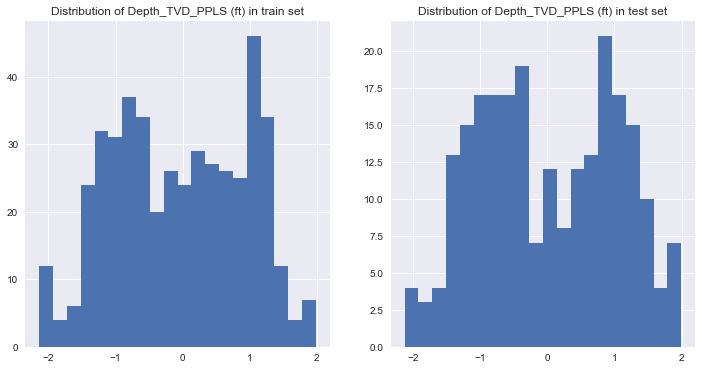

In [38]:
# Check distribution of 
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
(train.loc[:,"Erosion_PPLS (ft)"]).hist(ax=ax1,bins=20)
ax1.set_title("Distribution of Depth_TVD_PPLS (ft) in train set")
(test.loc[:,"Erosion_PPLS (ft)"]).hist(ax=ax2,bins=20)
ax2.set_title("Distribution of Depth_TVD_PPLS (ft) in test set")

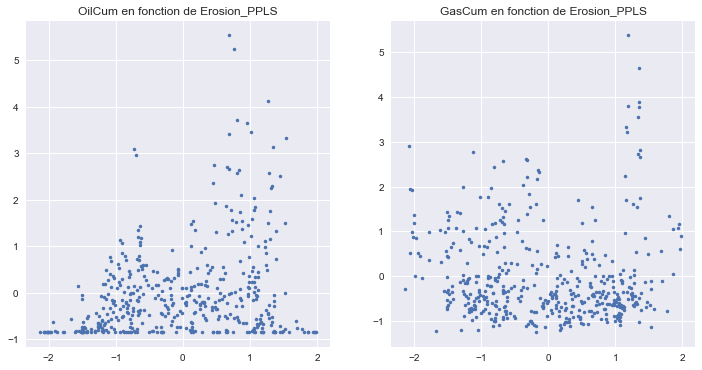

In [39]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(train["Erosion_PPLS (ft)"], train.OilCum360,'.')
ax1.set_title("OilCum en fonction de Erosion_PPLS")
ax2.plot(train["Erosion_PPLS (ft)"], train.GasCum360,'.')
ax2.set_title("GasCum en fonction de Erosion_PPLS")

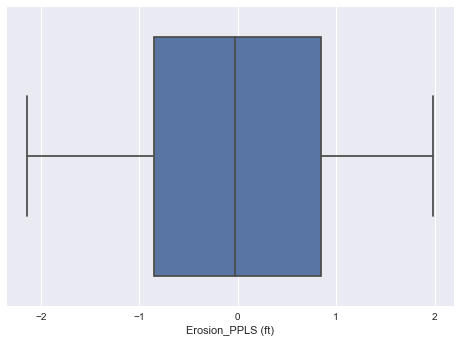

In [40]:
sns.boxplot(train["Erosion_PPLS (ft)"],whis=1.5)

No outliers & no clear dependence between this variable and oil/gas

# Pressure_PPLS (PSI)

In [41]:
#MV
train["Pressure_PPLS (PSI)"].isnull().sum()

9

In [42]:
missing= np.isnan(train["Pressure_PPLS (PSI)"])
mi=train.loc[missing,["API","Pressure_PPLS (PSI)","Zone"]]
mi
#corr = dfSep.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
#corr["Pressure_PPLS (PSI)"].sort_values(axis=0,ascending=False).iloc[1:]

,API,Pressure_PPLS (PSI),Zone
105,564,NaN,Z6
127,365,NaN,Z6
159,424,NaN,Z1
238,24,NaN,Z9
248,414,NaN,Z6
353,226,NaN,Z6
384,218,NaN,Z6
385,608,NaN,Z6
398,110,NaN,Z8


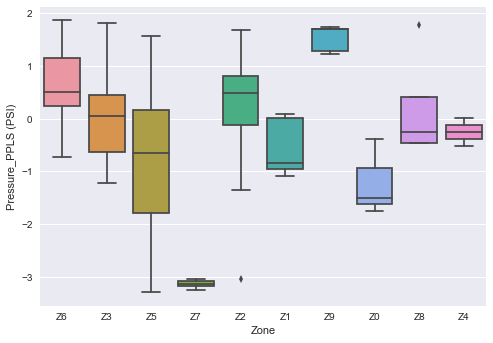

In [43]:
sns.boxplot(x='Zone', y='Pressure_PPLS (PSI)', data=train,whis=1.5)

An idea that would be good is to affect to missing values the mean the variable in the zone of the well

In [44]:
replace_by_mean_of_zone(train,'Pressure_PPLS (PSI)',mi)

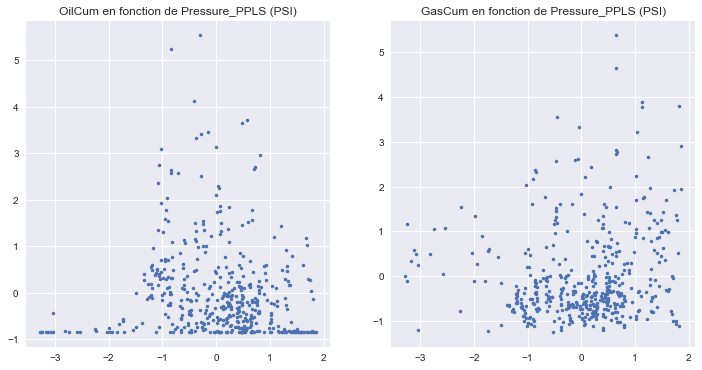

In [45]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(train["Pressure_PPLS (PSI)"], train.OilCum360,'.')
ax1.set_title("OilCum en fonction de Pressure_PPLS (PSI)")
ax2.plot(train["Pressure_PPLS (PSI)"], train.GasCum360,'.')
ax2.set_title("GasCum en fonction de Pressure_PPLS (PSI)")

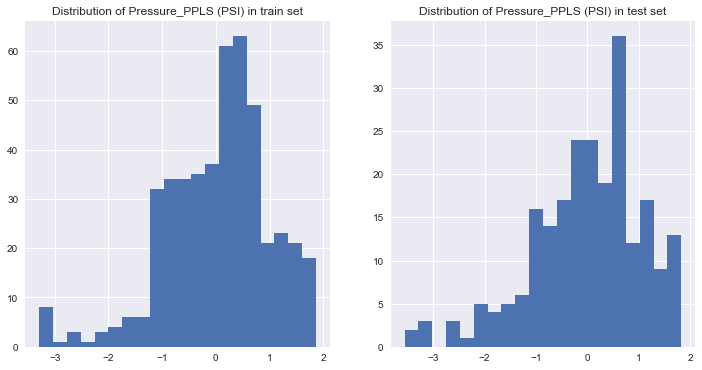

In [46]:
# Check distribution of 
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
(train.loc[:,"Pressure_PPLS (PSI)"]).hist(ax=ax1,bins=20)
ax1.set_title("Distribution of Pressure_PPLS (PSI) in train set")
(test.loc[:,"Pressure_PPLS (PSI)"]).hist(ax=ax2,bins=20)
ax2.set_title("Distribution of Pressure_PPLS (PSI) in test set")

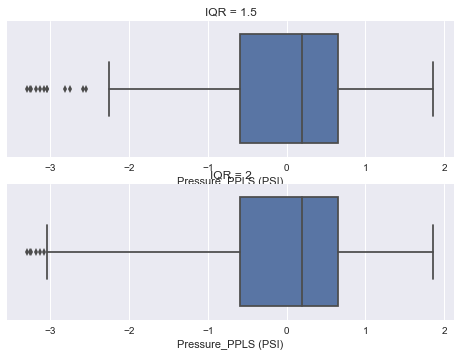

In [47]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(train["Pressure_PPLS (PSI)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(train["Pressure_PPLS (PSI)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [48]:
o2=outliers(train,"Pressure_PPLS (PSI)",1.5)[["Pressure_PPLS (PSI)","Zone"]]
o2

,Pressure_PPLS (PSI),Zone
20,-3.253818,Z7
92,-3.123381,Z7
115,-3.173381,Z7
137,-3.036875,Z2
150,-3.036744,Z7
171,-2.746134,Z5
233,-3.083163,Z7
235,-2.813885,Z5
307,-3.287442,Z5
311,-2.582161,Z5


In [49]:
replace_by_mean_of_zone(train,"Pressure_PPLS (PSI)",o2)

In [50]:
train.loc[o2.index,["Pressure_PPLS (PSI)","Zone"]]

,Pressure_PPLS (PSI),Zone
20,-3.134098,Z7
92,-3.110154,Z7
115,-3.107508,Z7
137,0.290046,Z2
150,-3.094333,Z7
171,-0.750173,Z5
233,-3.105851,Z7
235,-0.713210,Z5
307,-0.674309,Z5
311,-0.625918,Z5


# TOC_PPLS (%)

In [51]:
#MV
train["TOC_PPLS (%)"].isnull().sum()

0

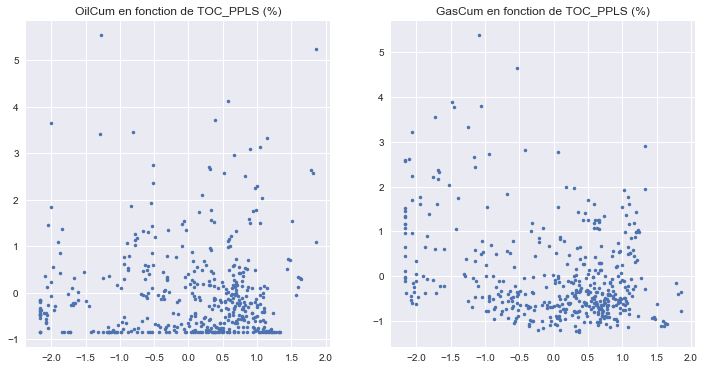

In [52]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(train["TOC_PPLS (%)"], train.OilCum360,'.')
ax1.set_title("OilCum en fonction de TOC_PPLS (%)")
ax2.plot(train["TOC_PPLS (%)"], train.GasCum360,'.')
ax2.set_title("GasCum en fonction de TOC_PPLS (%)")

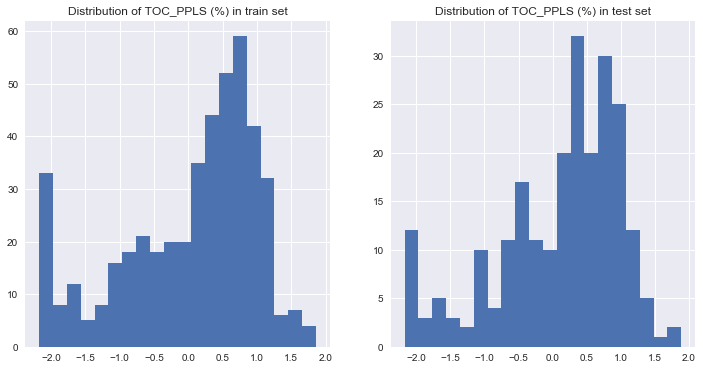

In [53]:
# Check distribution of 
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
(train.loc[:,"TOC_PPLS (%)"]).hist(ax=ax1,bins=20)
ax1.set_title("Distribution of TOC_PPLS (%) in train set")
(test.loc[:,"TOC_PPLS (%)"]).hist(ax=ax2,bins=20)
ax2.set_title("Distribution of TOC_PPLS (%) in test set")

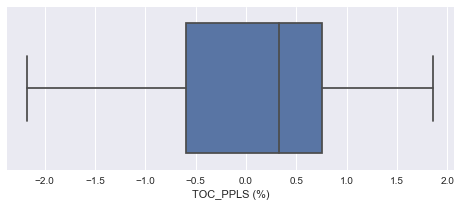

In [54]:
plt.figure(figsize = (8, 3))
sns.boxplot(train["TOC_PPLS (%)"],whis=1.5)

# Vcarb_PPLS    Vsand_PPLS    Vclay_PPLS

In [55]:
print(train["Vcarb_PPLS"].isnull().sum(),test["Vcarb_PPLS"].isnull().sum())
print(train["Vsand_PPLS"].isnull().sum(),test["Vcarb_PPLS"].isnull().sum())
print(train["Vclay_PPLS"].isnull().sum(),test["Vcarb_PPLS"].isnull().sum())

0 0
0 0
0 0


In [56]:
print(len(train["Vcarb_PPLS"].unique()),len(test["Vcarb_PPLS"].unique()))
print(len(train["Vsand_PPLS"].unique()),len(test["Vcarb_PPLS"].unique()))
print(len(train["Vclay_PPLS"].unique()),len(test["Vcarb_PPLS"].unique()))

39 34
30 34
17 34


As we see here we have some kind of steps for the 3 variables

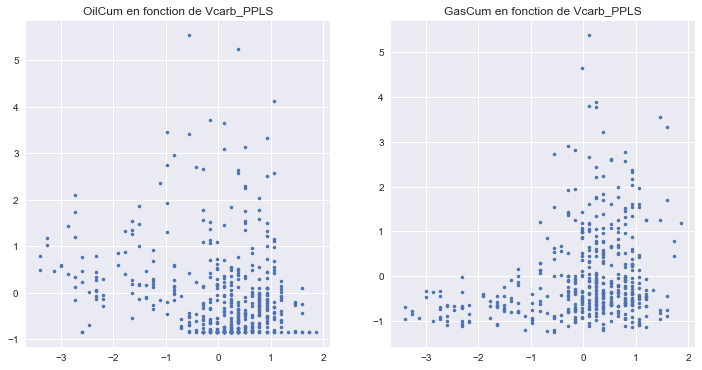

In [57]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(train["Vcarb_PPLS"], train.OilCum360,'.')
ax1.set_title("OilCum en fonction de Vcarb_PPLS")
ax2.plot(train["Vcarb_PPLS"], train.GasCum360,'.')
ax2.set_title("GasCum en fonction de Vcarb_PPLS")

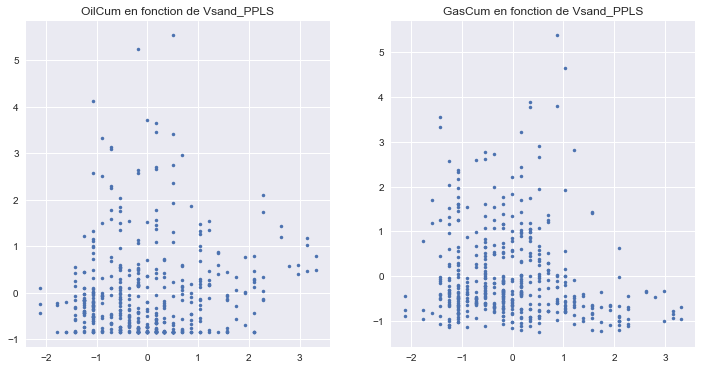

In [58]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(train["Vsand_PPLS"], train.OilCum360,'.')
ax1.set_title("OilCum en fonction de Vsand_PPLS")
ax2.plot(train["Vsand_PPLS"], train.GasCum360,'.')
ax2.set_title("GasCum en fonction de Vsand_PPLS")

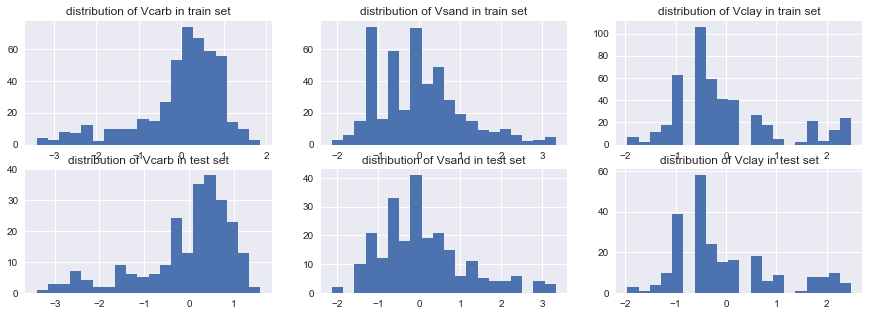

In [59]:
# Check distribution of volumes:
f, ax = plt.subplots(2,3,figsize=(15,5))
ax[0,0].hist(train["Vcarb_PPLS"],bins=20)
ax[0,0].set_title('distribution of Vcarb in train set')
ax[0,1].hist(train["Vsand_PPLS"],bins=20)
ax[0,1].set_title('distribution of Vsand in train set')
ax[0,2].hist(train["Vclay_PPLS"],bins=20)
ax[0,2].set_title('distribution of Vclay in train set')

ax[1,0].hist(test["Vcarb_PPLS"],bins=20)
ax[1,0].set_title('distribution of Vcarb in test set')
ax[1,1].hist(test["Vsand_PPLS"],bins=20)
ax[1,1].set_title('distribution of Vsand in test set')
ax[1,2].hist(test["Vclay_PPLS"],bins=20)
ax[1,2].set_title('distribution of Vclay in test set')

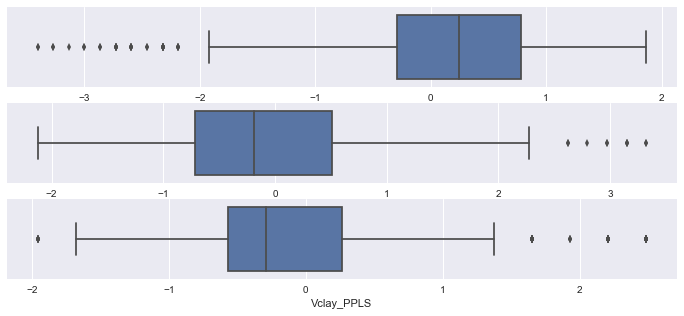

In [60]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2,ax3) = plt.subplots(3,1,figsize=(12,5))
sns.boxplot(train["Vcarb_PPLS"],whis=1.5,ax=ax1)
sns.boxplot(train["Vsand_PPLS"],whis=1.5,ax=ax2)
sns.boxplot(train["Vclay_PPLS"],whis=1.5,ax=ax3)

##### As the variables are taking a fixed number of values, dealing with outliers can biase results because we ll have to change those steps which would be the same in test 

# PR_PPLS

In [61]:
print(train["PR_PPLS"].isnull().sum(),test["PR_PPLS"].isnull().sum())

0 0


In [62]:
print(len(train["PR_PPLS"].unique()),len(test["PR_PPLS"].unique()))

12 12


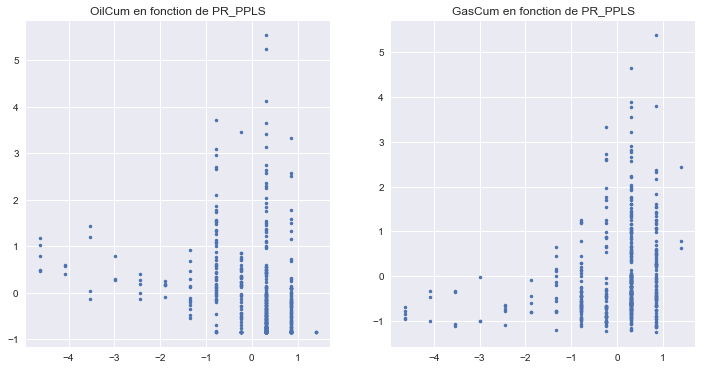

In [63]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(train["PR_PPLS"], train.OilCum360,'.')
ax1.set_title("OilCum en fonction de PR_PPLS")
ax2.plot(train["PR_PPLS"], train.GasCum360,'.')
ax2.set_title("GasCum en fonction de PR_PPLS")

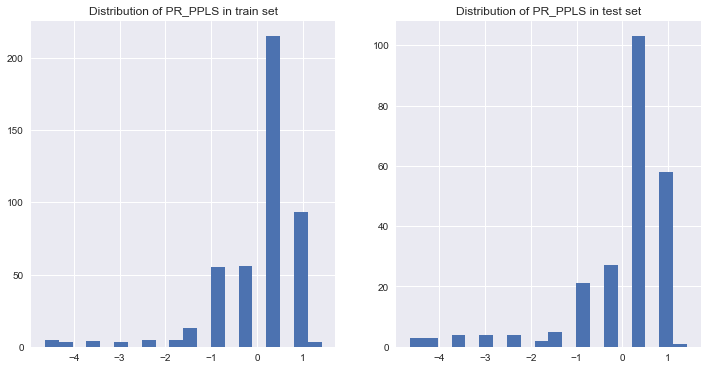

In [64]:
# Check distribution of 
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
(train.loc[:,"PR_PPLS"]).hist(ax=ax1,bins=20)
ax1.set_title("Distribution of PR_PPLS in train set")
(test.loc[:,"PR_PPLS"]).hist(ax=ax2,bins=20)
ax2.set_title("Distribution of PR_PPLS in test set")

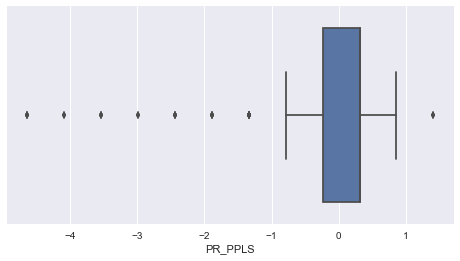

In [65]:
plt.figure(figsize = (8, 4))
sns.boxplot(train["PR_PPLS"],whis=1.5)


As we have just 12 unique values we have to keep the data without changing it

# YM_PPLS (PSI)

In [66]:
print(train["YM_PPLS (PSI)"].isnull().sum(),test["YM_PPLS (PSI)"].isnull().sum())

0 0


In [67]:
print(len(train["YM_PPLS (PSI)"].unique()),len(test["YM_PPLS (PSI)"].unique()))

459 235


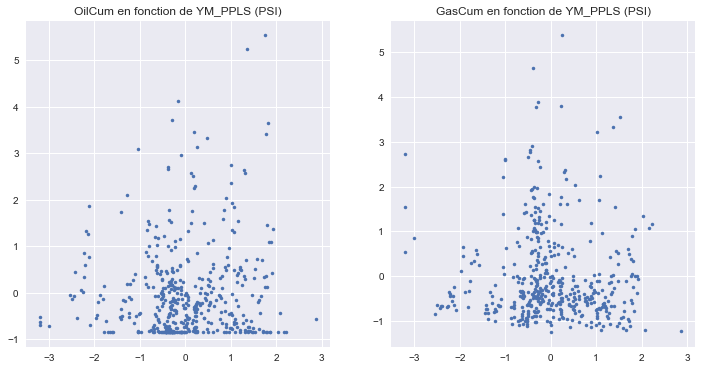

In [68]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(train["YM_PPLS (PSI)"], train.OilCum360,'.')
ax1.set_title("OilCum en fonction de YM_PPLS (PSI)")
ax2.plot(train["YM_PPLS (PSI)"], train.GasCum360,'.')
ax2.set_title("GasCum en fonction de YM_PPLS (PSI)")

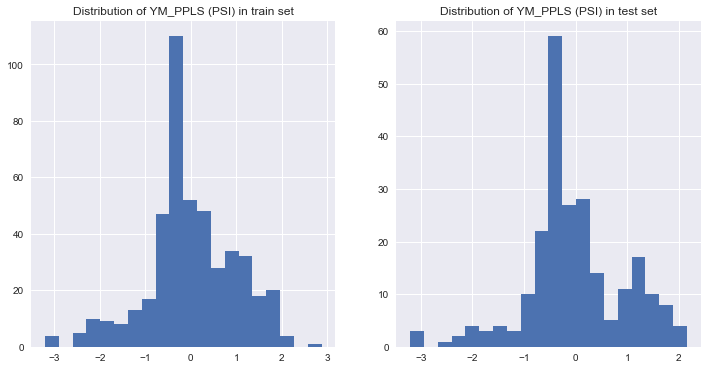

In [69]:
# Check distribution of 
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
(train.loc[:,"YM_PPLS (PSI)"]).hist(ax=ax1,bins=20)
ax1.set_title("Distribution of YM_PPLS (PSI) in train set")
(test.loc[:,"YM_PPLS (PSI)"]).hist(ax=ax2,bins=20)
ax2.set_title("Distribution of YM_PPLS (PSI) in test set")

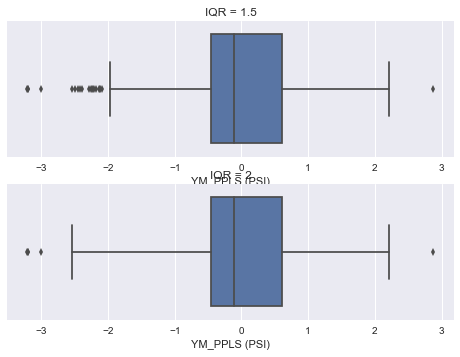

In [70]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(train["YM_PPLS (PSI)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(train["YM_PPLS (PSI)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [71]:
o4=outliers(train,"YM_PPLS (PSI)",2)
o4[["API","YM_PPLS (PSI)","Zone"]]

,API,YM_PPLS (PSI),Zone
11,534,-3.000775,Z6
71,442,-2.544159,Z3
74,479,-2.393747,Z3
86,4,-2.235527,Z3
144,279,-2.180330,Z3
169,61,-2.444793,Z3
222,120,-2.211039,Z3
232,606,-2.219888,Z3
248,414,-3.197711,Z6
257,502,2.876202,Z0


In [72]:
replace_by_mean_of_zone(train,"YM_PPLS (PSI)",o4)

# RHOB_PPLS (g/cc)

In [73]:
print(train["RHOB_PPLS (g/cc)"].isnull().sum(),test["RHOB_PPLS (g/cc)"].isnull().sum())

0 0


In [74]:
print(len(train["RHOB_PPLS (g/cc)"].unique()),len(test["RHOB_PPLS (g/cc)"].unique()))

62 58


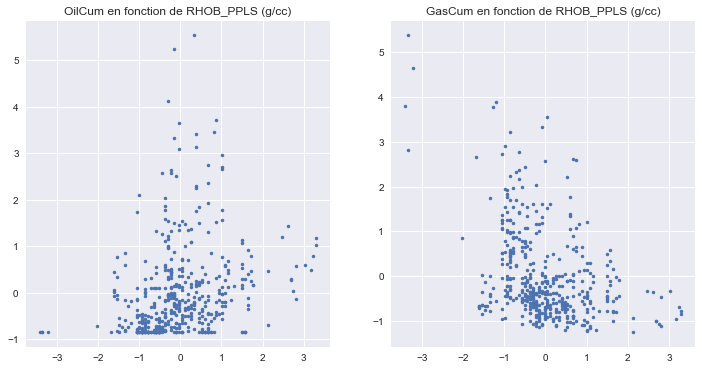

In [75]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(train["RHOB_PPLS (g/cc)"], train.OilCum360,'.')
ax1.set_title("OilCum en fonction de RHOB_PPLS (g/cc)")
ax2.plot(train["RHOB_PPLS (g/cc)"], train.GasCum360,'.')
ax2.set_title("GasCum en fonction de RHOB_PPLS (g/cc)")

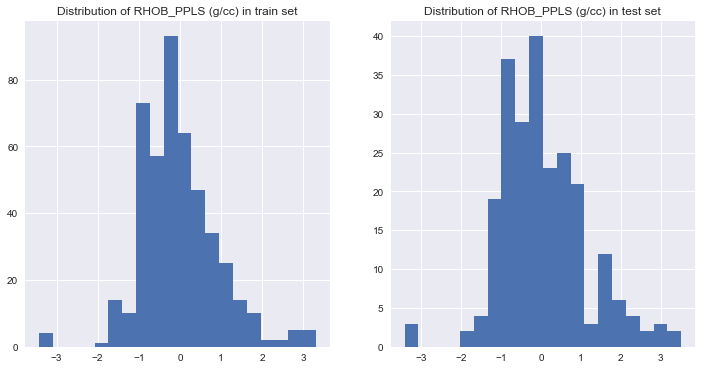

In [76]:
# Check distribution of 
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
(train.loc[:,"RHOB_PPLS (g/cc)"]).hist(ax=ax1,bins=20)
ax1.set_title("Distribution of RHOB_PPLS (g/cc) in train set")
(test.loc[:,"RHOB_PPLS (g/cc)"]).hist(ax=ax2,bins=20)
ax2.set_title("Distribution of RHOB_PPLS (g/cc) in test set")

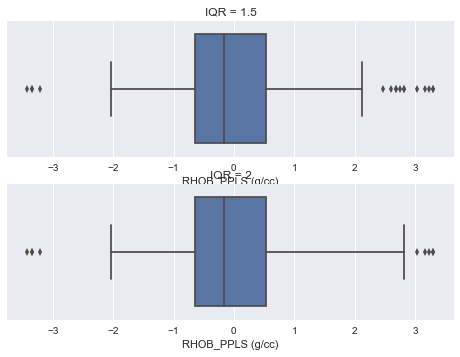

In [77]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(train["RHOB_PPLS (g/cc)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(train["RHOB_PPLS (g/cc)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

we can notice that we have a group of extreme values (>2) , but the same problem for volumes, if we change the data to other values we can change the values used for the steps

# Res_PPLS (Ohmm)

In [78]:
print(train["Res_PPLS (Ohmm)"].isnull().sum(),test["Res_PPLS (Ohmm)"].isnull().sum())

0 0


In [79]:
print(len(train["Res_PPLS (Ohmm)"].unique()),len(test["Res_PPLS (Ohmm)"].unique()))

453 232


This is not like the previous variable and volumes

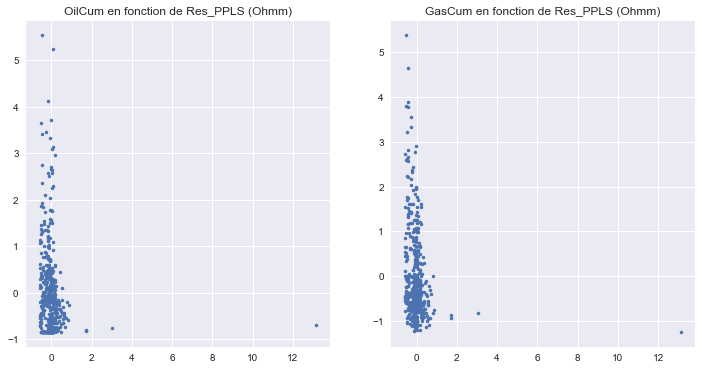

In [80]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(train["Res_PPLS (Ohmm)"], train.OilCum360,'.')
ax1.set_title("OilCum en fonction de Res_PPLS (Ohmm)")
ax2.plot(train["Res_PPLS (Ohmm)"], train.GasCum360,'.')
ax2.set_title("GasCum en fonction de Res_PPLS (Ohmm)")

### It's clear that there are some extreme values that should be replaced

In [81]:
ind=(train[train["Res_PPLS (Ohmm)"]>4]).index

In [82]:
train.loc[ind,["Res_PPLS (Ohmm)","Zone"]]

,Res_PPLS (Ohmm),Zone
159,13.158848,Z1


In [83]:
train.loc[ind,"Res_PPLS (Ohmm)"]=np.mean(train[train["Zone"]=="Z1"]["Res_PPLS (Ohmm)"])

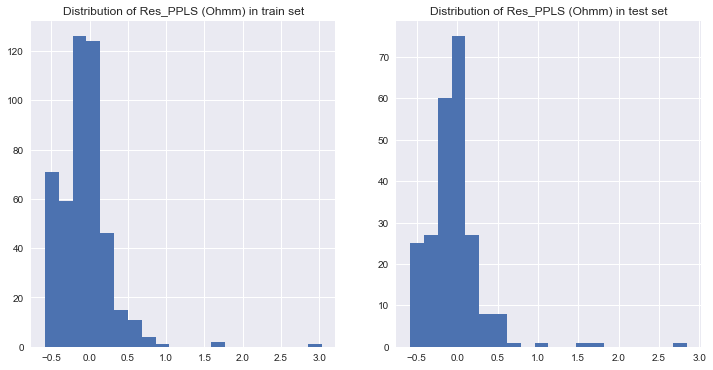

In [84]:
# Check distribution of 
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
(train.loc[:,"Res_PPLS (Ohmm)"]).hist(ax=ax1,bins=20)
ax1.set_title("Distribution of Res_PPLS (Ohmm) in train set")
(test.loc[:,"Res_PPLS (Ohmm)"]).hist(ax=ax2,bins=20)
ax2.set_title("Distribution of Res_PPLS (Ohmm) in test set")

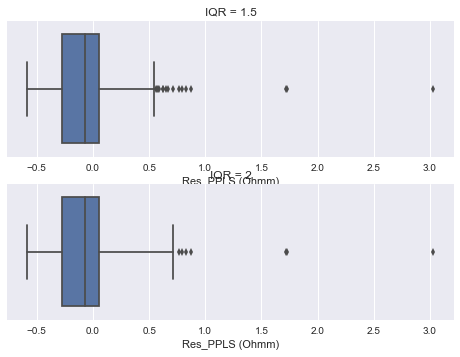

In [85]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(train["Res_PPLS (Ohmm)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(train["Res_PPLS (Ohmm)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

### As the disribution in test set is the same as in the train set, we can either replace outliers on the two sets or let them !! i will keep the values as we want firstly use the test set without changing it

In [86]:
#ind1=train[train["Res_PPLS (Ohmm)"]>1].index

In [87]:
#replace_by_mean_of_zone(train,"Res_PPLS (Ohmm)",train.loc[ind1,["Res_PPLS (Ohmm)","Zone"]])

In [88]:
#train.loc[ind1,["Res_PPLS (Ohmm)","Zone"]]

# GR_PPLS (API)

In [89]:
print(train["GR_PPLS (API)"].isnull().sum(),test["GR_PPLS (API)"].isnull().sum())

0 0


In [90]:
print(len(train["GR_PPLS (API)"].unique()),len(test["GR_PPLS (API)"].unique()))

397 219


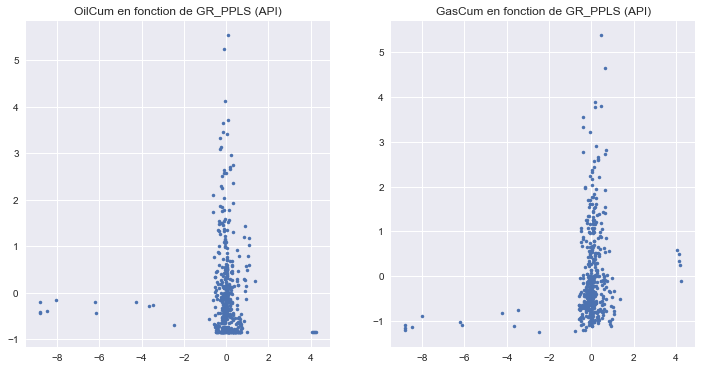

In [91]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(train["GR_PPLS (API)"], train.OilCum360,'.')
ax1.set_title("OilCum en fonction de GR_PPLS (API)")
ax2.plot(train["GR_PPLS (API)"], train.GasCum360,'.')
ax2.set_title("GasCum en fonction de GR_PPLS (API)")

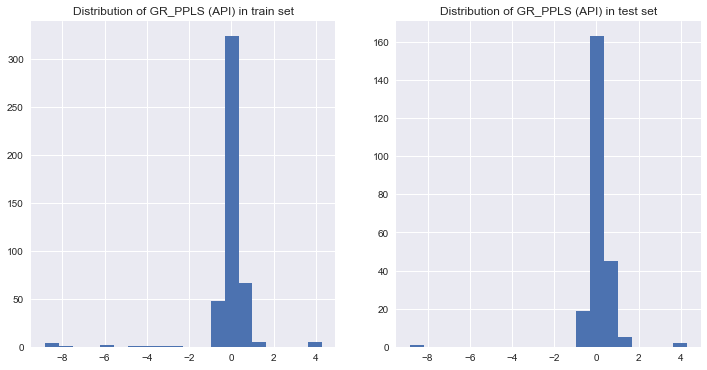

In [92]:
# Check distribution of 
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
(train.loc[:,"GR_PPLS (API)"]).hist(ax=ax1,bins=20)
ax1.set_title("Distribution of GR_PPLS (API) in train set")
(test.loc[:,"GR_PPLS (API)"]).hist(ax=ax2,bins=20)
ax2.set_title("Distribution of GR_PPLS (API) in test set")

### As the outliers are too extreme, we'll have to change them in the two sets so  as to keep the same distribution, i ll let them as i did for the previous variable

In [93]:
#ind2=train[train["GR_PPLS (API)"]<-2].index
#ind3=test[test["GR_PPLS (API)"]<-2].index

In [94]:
#replace_by_mean_of_zone(train,"GR_PPLS (API)",train.loc[ind2,["GR_PPLS (API)","Zone"]])
#replace_by_mean_of_zone(test,"GR_PPLS (API)",test.loc[ind3,["GR_PPLS (API)","Zone"]])

# DT_PPLS (us/ft)

In [95]:
print(train["DT_PPLS (us/ft)"].isnull().sum(),test["DT_PPLS (us/ft)"].isnull().sum())

0 0


In [96]:
print(len(train["DT_PPLS (us/ft)"].unique()),len(test["DT_PPLS (us/ft)"].unique()))

327 193


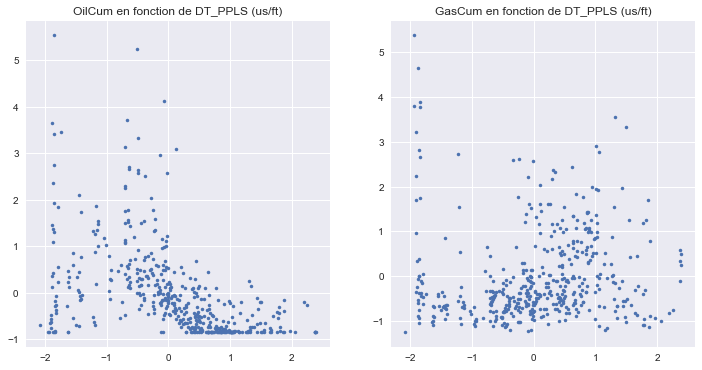

In [97]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(train["DT_PPLS (us/ft)"], train.OilCum360,'.')
ax1.set_title("OilCum en fonction de DT_PPLS (us/ft)")
ax2.plot(train["DT_PPLS (us/ft)"], train.GasCum360,'.')
ax2.set_title("GasCum en fonction de DT_PPLS (us/ft)")

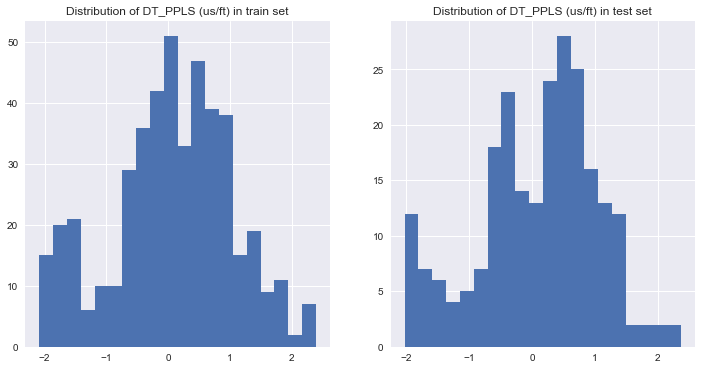

In [98]:
# Check distribution of 
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
(train.loc[:,"DT_PPLS (us/ft)"]).hist(ax=ax1,bins=20)
ax1.set_title("Distribution of DT_PPLS (us/ft) in train set")
(test.loc[:,"DT_PPLS (us/ft)"]).hist(ax=ax2,bins=20)
ax2.set_title("Distribution of DT_PPLS (us/ft) in test set")

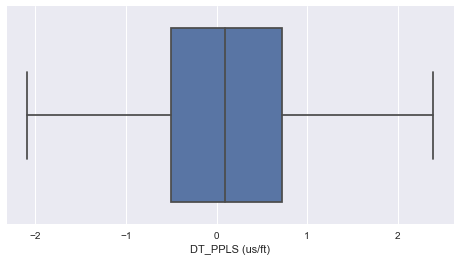

In [99]:
plt.figure(figsize = (8, 4))
sns.boxplot(train["DT_PPLS (us/ft)"],whis=1.5)

# DTs_PPLS (us/ft)

In [100]:
print(train["DTs_PPLS (us/ft)"].isnull().sum(),test["DTs_PPLS (us/ft)"].isnull().sum())

0 0


In [101]:
print(len(train["DTs_PPLS (us/ft)"].unique()),len(test["DTs_PPLS (us/ft)"].unique()))

427 228


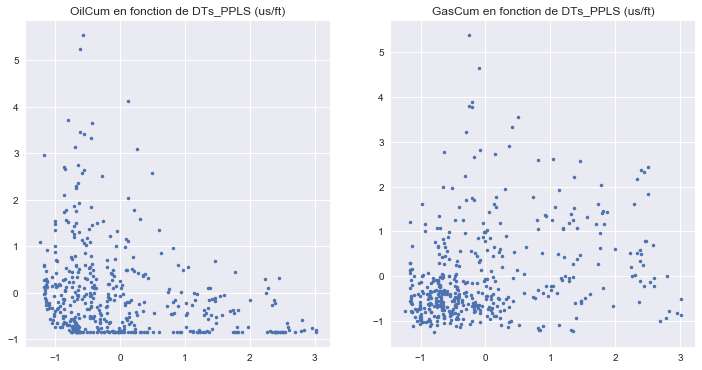

In [102]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(train["DTs_PPLS (us/ft)"], train.OilCum360,'.')
ax1.set_title("OilCum en fonction de DTs_PPLS (us/ft)")
ax2.plot(train["DTs_PPLS (us/ft)"], train.GasCum360,'.')
ax2.set_title("GasCum en fonction de DTs_PPLS (us/ft)")

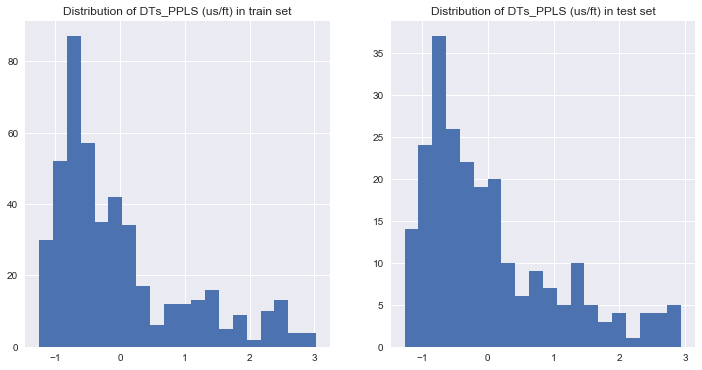

In [103]:
# Check distribution of 
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
(train.loc[:,"DTs_PPLS (us/ft)"]).hist(ax=ax1,bins=20)
ax1.set_title("Distribution of DTs_PPLS (us/ft) in train set")
(test.loc[:,"DTs_PPLS (us/ft)"]).hist(ax=ax2,bins=20)
ax2.set_title("Distribution of DTs_PPLS (us/ft) in test set")

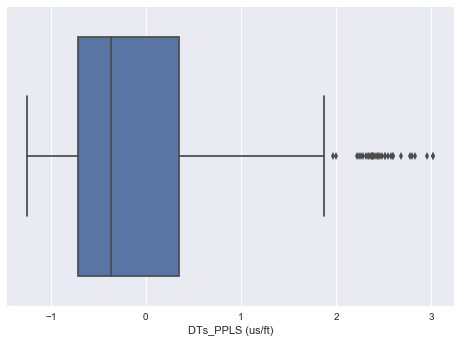

In [104]:
sns.boxplot(train["DTs_PPLS (us/ft)"],whis=1.5)

### i ll let them as i did for the previous variable

# Nbr_Stages

In [105]:
print(train["Nbr_Stages"].isnull().sum(),test["Nbr_Stages"].isnull().sum())

97 41


In [106]:
print(len(train["Nbr_Stages"].unique()),len(test["Nbr_Stages"].unique()))

54 50


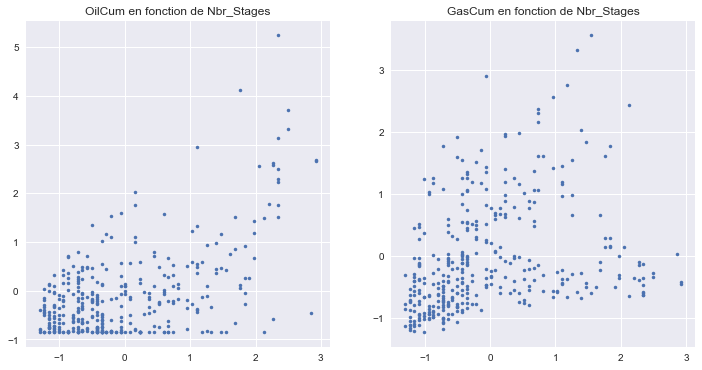

In [107]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(train["Nbr_Stages"], train.OilCum360,'.')
ax1.set_title("OilCum en fonction de Nbr_Stages")
ax2.plot(train["Nbr_Stages"], train.GasCum360,'.')
ax2.set_title("GasCum en fonction de Nbr_Stages")

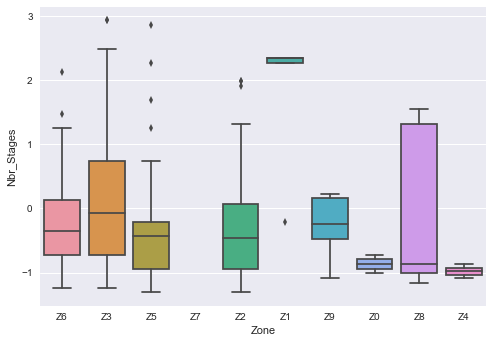

In [108]:
sns.boxplot(x="Zone",y="Nbr_Stages",data=train,whis=1.5)

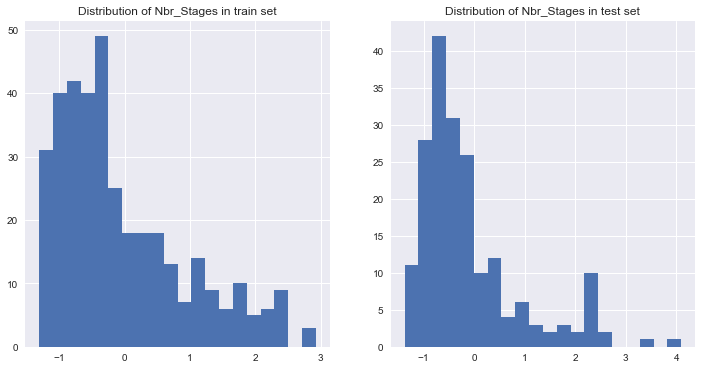

In [109]:
# Check distribution of 
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
(train.loc[:,"Nbr_Stages"]).hist(ax=ax1,bins=20)
ax1.set_title("Distribution of Nbr_Stages in train set")
(test.loc[:,"Nbr_Stages"]).hist(ax=ax2,bins=20)
ax2.set_title("Distribution of Nbr_Stages in test set")

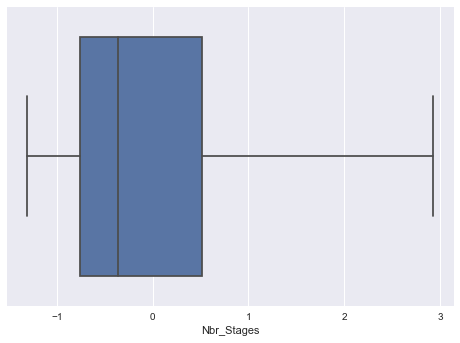

In [110]:
sns.boxplot(train["Nbr_Stages"],whis=2)

We can say that there are no outlier with IQR =2

In [114]:
train.to_csv("Train_all_cleaned.csv",index=False, sep=';')